## Introduction

**What is Regression?**
___
Regression in machine learning consists of mathematical methods that allow data scientists to predict a continuous dependent outcome (y) based on the values of one or more independent variables (X)

**What are the different types of Regression?**
___

* Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random FOrest Regression

**Link for dataset**
___
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**The Goal**
___

The goal to predict the sales price for each house. For each Id in the test set, the value of the SalePrice variable is to be predicted. 

Since the dataset invlves more than 1 feature, here, we'll be using Multiple Linear Regression, Decision Tree Regression and Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

The Training and Test dataset are imported... Also, a dataset_total is created consisting of both training and test set to apply the preprocessing techniques to the whole dataset...

In [2]:
dataset = pd.read_csv('house_prices_prediction_train.csv')
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [3]:
dataset_test = pd.read_csv('house_prices_prediction_test.csv')
dataset_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [4]:
dataset_total = pd.concat(map(pd.read_csv, ['house_prices_prediction_train.csv', 'house_prices_prediction_test.csv']), ignore_index=True)

In [5]:
dataset_total

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitche

In [6]:
dataset_total["MSSubClass"]

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64

## Data Preprocessing

To figure out the different preprocessing techniques to be applied on the dataset, we first have a look at the dataset

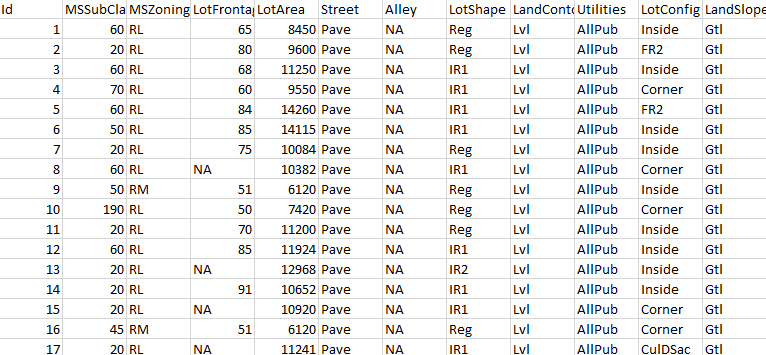

We can see that there are many NA values, different string type labels in a column, hence, 
* Techniques to convert NA in float type columns have to replace by 0 and convert NA in string type column to "None"
* All the categorical labels to be encoded using Label Encoder

### Missing values

The percentage of missing values in each column are:

In [7]:
features=[features for features in dataset_total.columns if dataset_total[features].isnull().sum()>1]
for feature in features:
    print(feature, np.round(dataset_total[feature].isnull().mean(), 4),  ' % missing values.\n')

MSZoning 0.0014  % missing values.

LotFrontage 0.1665  % missing values.

Alley 0.9322  % missing values.

Utilities 0.0007  % missing values.

MasVnrType 0.0082  % missing values.

MasVnrArea 0.0079  % missing values.

BsmtQual 0.0277  % missing values.

BsmtCond 0.0281  % missing values.

BsmtExposure 0.0281  % missing values.

BsmtFinType1 0.0271  % missing values.

BsmtFinType2 0.0274  % missing values.

BsmtFullBath 0.0007  % missing values.

BsmtHalfBath 0.0007  % missing values.

Functional 0.0007  % missing values.

FireplaceQu 0.4865  % missing values.

GarageType 0.0538  % missing values.

GarageYrBlt 0.0545  % missing values.

GarageFinish 0.0545  % missing values.

GarageQual 0.0545  % missing values.

GarageCond 0.0545  % missing values.

PoolQC 0.9966  % missing values.

Fence 0.8044  % missing values.

MiscFeature 0.964  % missing values.

SalePrice 0.4998  % missing values.



Drop id and the columns with more than 20% of missing values, because they might mislead the model even if they are replaced with some reasonable values

In [8]:
dataset_total = dataset_total.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],1)
dataset_total = dataset_total.drop(['Id'],1)

In [9]:
dataset_total

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,NaN


SalePrice is the values to be predicted and doesn't require any preprocessing, like for other columns. It doesn't even have any missing value

In [10]:
dataset_total = dataset_total.drop(columns = "SalePrice")

In [11]:
categorical_cols= dataset_total.select_dtypes(include=['object'])

In [12]:
categorical_cols_missing = categorical_cols.columns[categorical_cols.isnull().any()]
categorical_cols_missing

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

SimpleImputer to replace null values in categorical columns

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
for feature in categorical_cols_missing:
     categorical_cols[feature] = imputer.fit_transform(categorical_cols[feature].values.reshape(-1,1))
     dataset_total[feature] = imputer.fit_transform(dataset_total[feature].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [14]:
categorical_cols.columns[categorical_cols.isnull().any()]

Index([], dtype='object')

The missing values from categorical columns have been successfully removed!

Now, missing values in numerical columns have to be removed

In [15]:
dataset_total._get_numeric_data()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [16]:
numeric_cols_missing = list(dataset_total.columns[dataset_total.isnull().any()])
numeric_cols_missing

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

The null values are replaced by mean of the columns in numerical columns

In [17]:
for i in numeric_cols_missing:
  dataset_total[i].fillna(np.mean(dataset_total[i]), inplace = True)

In [18]:
dataset_total.columns[dataset_total.isnull().any()]

Index([], dtype='object')

Yayy, the dataset is finally free of any missing values!!!

The column SalePrice is the column that we have to predict using test set given, therefore the column can be dropped because it shouldn't be a part of trainning set...

### One Hot Encoding


Some of the columns in the dataset have string or categorical values which should be converted to numeric form so that it is machine readable. This is done using a One Hot Encoder

So first, the unique labels in the categorical columns are obtained and analysed.

In [19]:
for i in categorical_cols.columns:
    print(i,':', len(categorical_cols[i].unique()),'unique labels')

MSZoning : 5 unique labels
Street : 2 unique labels
LotShape : 4 unique labels
LandContour : 4 unique labels
Utilities : 2 unique labels
LotConfig : 5 unique labels
LandSlope : 3 unique labels
Neighborhood : 25 unique labels
Condition1 : 9 unique labels
Condition2 : 8 unique labels
BldgType : 5 unique labels
HouseStyle : 8 unique labels
RoofStyle : 6 unique labels
RoofMatl : 8 unique labels
Exterior1st : 15 unique labels
Exterior2nd : 16 unique labels
MasVnrType : 4 unique labels
ExterQual : 4 unique labels
ExterCond : 5 unique labels
Foundation : 6 unique labels
BsmtQual : 4 unique labels
BsmtCond : 4 unique labels
BsmtExposure : 4 unique labels
BsmtFinType1 : 6 unique labels
BsmtFinType2 : 6 unique labels
Heating : 6 unique labels
HeatingQC : 5 unique labels
CentralAir : 2 unique labels
Electrical : 5 unique labels
KitchenQual : 4 unique labels
Functional : 7 unique labels
GarageType : 6 unique labels
GarageFinish : 3 unique labels
GarageQual : 5 unique labels
GarageCond : 5 unique l

In [20]:
categorical_cols.Condition1.value_counts().sort_values(ascending=False)

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

Not all the labels of the categorical columns play significant role... SO only the important labels are obtained as follows and then one hot encoding is applied...

In [21]:
freq_labels= [x for x in categorical_cols.Condition1.value_counts().sort_values(ascending=False).head(4).index]
freq_labels

['Norm', 'Feedr', 'Artery', 'RRAn']

In [22]:
for label in freq_labels:
    categorical_cols[label]= np.where(categorical_cols['Condition1']==label,1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
categorical_cols[['Condition1']+freq_labels].head(10)

,Condition1,Norm,Feedr,Artery,RRAn
0,Norm,1,0,0,0
1,Feedr,0,1,0,0
2,Norm,1,0,0,0
3,Norm,1,0,0,0
4,Norm,1,0,0,0
5,Norm,1,0,0,0
6,Norm,1,0,0,0
7,PosN,0,0,0,0
8,Artery,0,0,1,0
9,Artery,0,0,1,0


In [24]:
def one_hot_freq_labels(data,variable,freq_labels):
    for label in freq_labels:
        data[variable+'_'+label]= np.where(data[variable]==label,1,0)

In [25]:
# the categories have been selected manually according to their frequencies

freq_labels_Condition1=[x for x in categorical_cols.Condition1.value_counts().sort_values(ascending=False).head(4).index]
freq_labels_Exterior2nd= [x for x in categorical_cols.Exterior2nd.value_counts().sort_values(ascending=False).head(5).index]
freq_labels_Condition2=[x for x in categorical_cols.Condition2.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_HouseStyle =[x for x in categorical_cols.HouseStyle .value_counts().sort_values(ascending=False).head(4).index]
freq_labels_RoofStyle =[x for x in categorical_cols.RoofStyle.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_RoofMatl  =[x for x in categorical_cols.RoofMatl.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Exterior1st =[x for x in categorical_cols.Exterior1st.value_counts().sort_values(ascending=False).head(5).index]
freq_labels_MasVnrType =[x for x in categorical_cols.MasVnrType.value_counts().sort_values(ascending=False).head(3).index]

freq_labels_ExterQual =[x for x in categorical_cols.ExterQual.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_ExterCond =[x for x in categorical_cols.ExterCond.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Foundation =[x for x in categorical_cols.Foundation.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtQual =[x for x in categorical_cols.BsmtQual.value_counts().sort_values(ascending=False).head(4).index]
freq_labels_BsmtCond =[x for x in categorical_cols.BsmtCond.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtExposure =[x for x in categorical_cols.BsmtExposure.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtFinType1=[x for x in categorical_cols.BsmtFinType1.value_counts().sort_values(ascending=False).head(6).index]

freq_labels_BsmtFinType2 =[x for x in categorical_cols.BsmtFinType2.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Heating =[x for x in categorical_cols.Heating.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_HeatingQC =[x for x in categorical_cols.HeatingQC.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_CentralAir =[x for x in categorical_cols.BsmtExposure.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_Electrical=[x for x in categorical_cols.BsmtFinType1.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_KitchenQual=[x for x in categorical_cols.KitchenQual.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Functional =[x for x in categorical_cols.Functional.value_counts().sort_values(ascending=False).head(2).index]

freq_labels_GarageType =[x for x in categorical_cols.GarageType.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_GarageFinish =[x for x in categorical_cols.GarageFinish.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_GarageQual=[x for x in categorical_cols.GarageQual.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_GarageCond=[x for x in categorical_cols.GarageCond.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_PavedDrive =[x for x in categorical_cols.PavedDrive.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_SaleType =[x for x in categorical_cols.SaleType.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_SaleCondition =[x for x in categorical_cols.SaleCondition.value_counts().sort_values(ascending=False).head(3).index]

freq_labels_MSZoning =[x for x in categorical_cols.MSZoning.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Street =[x for x in categorical_cols.Street.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_LotShape=[x for x in categorical_cols.LotShape.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_LandContour=[x for x in categorical_cols.LandContour.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Utilities =[x for x in categorical_cols.Utilities.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_LotConfig =[x for x in categorical_cols.LotConfig.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_LandSlope =[x for x in categorical_cols.LandSlope.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_BldgType=[x for x in categorical_cols.BldgType.value_counts().sort_values(ascending=False).head(3).index]

In [26]:
one_hot_freq_labels(dataset_total,'Exterior2nd',freq_labels_Exterior2nd)
one_hot_freq_labels(dataset_total,'Condition1',freq_labels_Condition1)
one_hot_freq_labels(dataset_total,'Condition2',freq_labels_Condition2)
one_hot_freq_labels(dataset_total,'HouseStyle',freq_labels_HouseStyle)
one_hot_freq_labels(dataset_total,'RoofStyle',freq_labels_RoofStyle)
one_hot_freq_labels(dataset_total,'RoofMatl',freq_labels_RoofMatl )
one_hot_freq_labels(dataset_total,'Exterior1st',freq_labels_Exterior1st)
one_hot_freq_labels(dataset_total,'MasVnrType',freq_labels_MasVnrType)
one_hot_freq_labels(dataset_total,'ExterQual',freq_labels_ExterQual)
one_hot_freq_labels(dataset_total,'ExterCond',freq_labels_ExterCond )
one_hot_freq_labels(dataset_total,'Foundation',freq_labels_Foundation)
one_hot_freq_labels(dataset_total,'BsmtQual',freq_labels_BsmtQual)
one_hot_freq_labels(dataset_total,'BsmtCond',freq_labels_BsmtCond)
one_hot_freq_labels(dataset_total,'BsmtExposure',freq_labels_BsmtExposure)
one_hot_freq_labels(dataset_total,'BsmtFinType1',freq_labels_BsmtFinType1)
one_hot_freq_labels(dataset_total,'BsmtFinType2',freq_labels_BsmtFinType2 )
one_hot_freq_labels(dataset_total,'Heating',freq_labels_Heating)
one_hot_freq_labels(dataset_total,'HeatingQC',freq_labels_HeatingQC)
one_hot_freq_labels(dataset_total,'CentralAir',freq_labels_CentralAir)
one_hot_freq_labels(dataset_total,'Electrical',freq_labels_Electrical)
one_hot_freq_labels(dataset_total,'KitchenQual',freq_labels_KitchenQual)
one_hot_freq_labels(dataset_total,'Functional',freq_labels_Functional)
one_hot_freq_labels(dataset_total,'GarageType',freq_labels_GarageType)
one_hot_freq_labels(dataset_total,'GarageFinish',freq_labels_GarageFinish)
one_hot_freq_labels(dataset_total,'GarageQual',freq_labels_GarageQual)
one_hot_freq_labels(dataset_total,'GarageCond',freq_labels_GarageCond)
one_hot_freq_labels(dataset_total,'PavedDrive',freq_labels_PavedDrive)
one_hot_freq_labels(dataset_total,'SaleType',freq_labels_SaleType)
one_hot_freq_labels(dataset_total,'SaleCondition',freq_labels_SaleCondition)

The one hot encoded columns with new labels are added to the table... Therefore the previous columns (which included all the labels) have to be dropped

In [27]:
dataset_total =dataset_total.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],1)

In [28]:
dataset_total

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_Rec,Heating_GasA,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,CentralAir_No,Electrical_Unf,Electrical_GLQ,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,Functional_Typ,Functional_Min2,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageFinish_Unf,GarageFinish_RFn,GarageFinish_Fin,GarageQual_TA,GarageQual_Fa,GarageCond_TA,GarageCond_Fa,PavedDrive_Y,PavedDrive_N,SaleType_WD,SaleType_New,SaleType_COD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.000000,2.0,548.0,0,61,0,0,0,0,0,2,2008,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.000000,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.000000,2.0,608.0,0,42,0,0,0,0,0,9,2008,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.000000,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.000000,3.0,836.0,192,84,0,0,0,0,0,12,2008,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0


## Preparing dataset

The dataset_total consisting of both training and test set is divided into training and test set

y_train is obtained from the original "dataset" because it consists of plain numerical value and did not require any preprocessing and consists of "SalePrice"

In [29]:
X=dataset_total.iloc[:1460,:]
y=dataset['SalePrice']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [31]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_Rec,Heating_GasA,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,CentralAir_No,Electrical_Unf,Electrical_GLQ,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,Functional_Typ,Functional_Min2,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageFinish_Unf,GarageFinish_RFn,GarageFinish_Fin,GarageQual_TA,GarageQual_Fa,GarageCond_TA,GarageCond_Fa,PavedDrive_Y,PavedDrive_N,SaleType_WD,SaleType_New,SaleType_COD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml
503,20,100.000000,15602,7,8,1959,1997,0.0,1247.0,0.0,254.0,1501.0,1801,0,0,1801,1.0,0.0,2,0,1,1,6,2,1959.0,2.0,484.0,0,54,0,0,161,0,0,3,2010,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0
87,160,40.000000,3951,6,5,2009,2009,76.0,0.0,0.0,612.0,612.0,612,612,0,1224,0.0,0.0,2,1,2,1,4,0,2009.0,2.0,528.0,0,234,0,0,0,0,0,6,2009,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
500,160,21.000000,1890,6,5,1973,1973,285.0,356.0,0.0,316.0,672.0,672,546,0,1218,0.0,0.0,1,1,3,1,7,0,1973.0,1.0,264.0,144,28,0,0,0,0,0,5,2007,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
1332,20,67.000000,8877,4,6,1938,1958,0.0,690.0,0.0,126.0,816.0,816,0,0,816,1.0,0.0,1,0,2,1,3,1,1958.0,1.0,288.0,0,0,0,0,0,0,0,5,2009,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0
658,50,78.000000,17503,6,5,1948,1950,0.0,0.0,0.0,912.0,912.0,912,546,0,1458,0.0,1.0,1,0,3,1,6,1,1948.0,1.0,330.0,192,0,0,0,0,0,0,1,2010,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,120,65.000000,8769,9,5,2008,2008,766.0,1540.0,0.0,162.0,1702.0,1702,0,0,1702,1.0,0.0,1,1,1,1,7,1,2008.0,3.0,1052.0,0,72,0,0,224,0,0,10,2008,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0
1077,20,69.305795,15870,5,5,1969,1969,0.0,75.0,791.0,230.0,1096.0,1096,0,0,1096,1.0,0.0,1,0,3,1,6,0,1969.0,1.0,299.0,240,32,0,0,0,0,0,3,2006,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1
1318,20,69.305795,14781,8,5,2001,2002,178.0,0.0,0.0,1753.0,1753.0,1787,0,0,1787,0.0,0.0,2,0,3,1,7,1,2001.0,3.0,748.0,198,150,0,0,0,0,0,8,2006,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
723,50,60.000000,8172,4,6,1954,1972,0.0,0.0,0.0,941.0,941.0,997,473,0,1470,0.0,0.0,2,0,4,1,7,0,1958.0,1.0,548.0,0,0,0,0,156,0,0,5,2008,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [32]:
X_test = dataset_total.iloc[1460:,:]

In [33]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_Rec,Heating_GasA,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,CentralAir_No,Electrical_Unf,Electrical_GLQ,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,Functional_Typ,Functional_Min2,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageFinish_Unf,GarageFinish_RFn,GarageFinish_Fin,GarageQual_TA,GarageQual_Fa,GarageCond_TA,GarageCond_Fa,PavedDrive_Y,PavedDrive_N,SaleType_WD,SaleType_New,SaleType_COD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.000000,1.0,730.0,140,0,0,0,120,0,0,6,2010,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.000000,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.000000,2.0,482.0,212,34,0,0,0,0,0,3,2010,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.000000,2.0,470.0,360,36,0,0,0,0,0,6,2010,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.000000,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1978.113406,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.000000,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.000000,2.0,576.0,474,0,0,0,0,0,0,9,2006,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1978.113406,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0


## Multiple Linear Regression

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable. It has the equation of the form 

y = A+B1x1+B2x2+B3x3+B4x4

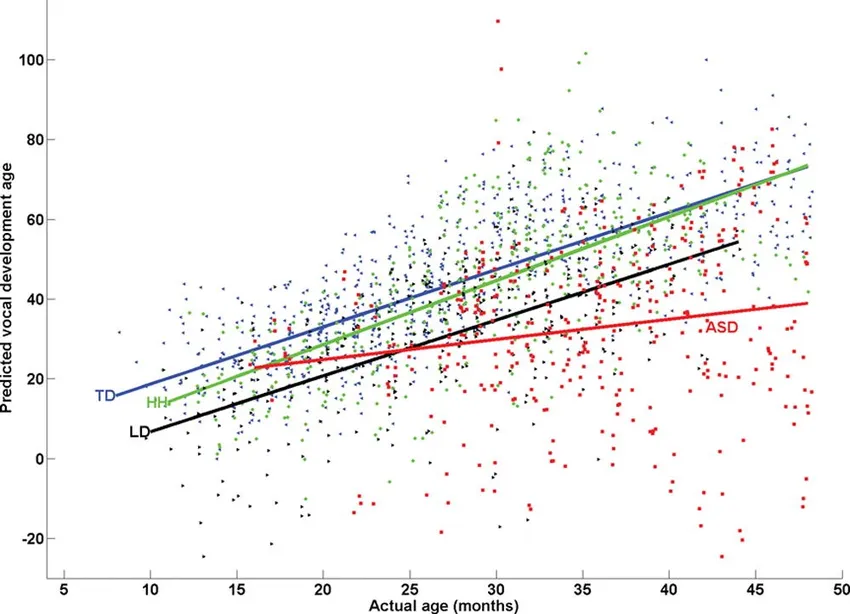

In [34]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression();
regressor2.fit(x_train,y_train)

LinearRegression()

### Predicting a new result

In [35]:
y_pred2 = list(regressor2.predict(x_test))
y_pred2

[222210.9784122269,
 362599.05305434205,
 175722.43698535196,
 88423.23424049886,
 260646.1250713159,
 228349.3367578925,
 178088.5940224561,
 110326.24673142529,
 279414.76555378654,
 164918.0476371164,
 116994.95635617699,
 149687.73602424306,
 148351.0424792316,
 127190.35005373834,
 292219.2987163629,
 303891.65453317657,
 181947.8866933476,
 189073.26716599893,
 132377.39244569547,
 160486.26327898097,
 120723.39828659,
 123413.57105416153,
 75852.17824632803,
 115690.51822729758,
 220632.28042646882,
 232318.4479873993,
 282968.4572938606,
 198842.8661586505,
 313435.8136978543,
 130862.71786390245,
 257022.15664480708,
 140010.3127764674,
 286285.70808702556,
 118649.08207393787,
 115277.66926858597,
 256905.52263107186,
 172877.8339370502,
 159049.07414275745,
 137117.1525823524,
 114284.40050656348,
 121765.16437599529,
 116369.71497685311,
 121407.83132614184,
 292094.96090946463,
 208634.5886202054,
 141266.53311088355,
 171551.06086233724,
 163117.30798340554,
 117853.31066

In [36]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred2)**0.5)

27595.260280297865


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred2)
r2

0.8613591854301375

## Decision Tree Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

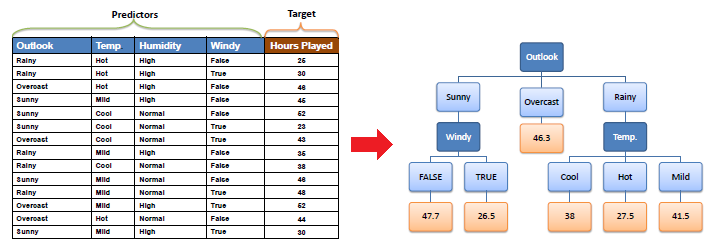

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

### Predicting a new result

In [39]:
y_pred3 = list(regressor3.predict(x_test))
y_pred3

[192000.0,
 324000.0,
 172785.0,
 87500.0,
 215000.0,
 194000.0,
 190000.0,
 106000.0,
 354000.0,
 147000.0,
 144900.0,
 149500.0,
 144000.0,
 139500.0,
 260000.0,
 275000.0,
 184100.0,
 202665.0,
 123000.0,
 160000.0,
 141000.0,
 99500.0,
 120000.0,
 132250.0,
 256300.0,
 185000.0,
 380000.0,
 191000.0,
 209500.0,
 165500.0,
 335000.0,
 142125.0,
 290000.0,
 138000.0,
 118000.0,
 324000.0,
 168500.0,
 172500.0,
 124500.0,
 131500.0,
 140000.0,
 129900.0,
 127000.0,
 250580.0,
 140000.0,
 155000.0,
 140000.0,
 160000.0,
 108000.0,
 160000.0,
 127500.0,
 196500.0,
 91000.0,
 133500.0,
 451950.0,
 143500.0,
 109000.0,
 147000.0,
 151000.0,
 235000.0,
 235000.0,
 149000.0,
 173000.0,
 135000.0,
 230000.0,
 66500.0,
 177000.0,
 201800.0,
 145000.0,
 115000.0,
 144000.0,
 131500.0,
 251000.0,
 177000.0,
 185000.0,
 169000.0,
 85400.0,
 310000.0,
 165000.0,
 133500.0,
 124500.0,
 380000.0,
 172500.0,
 134500.0,
 328000.0,
 350000.0,
 280000.0,
 245000.0,
 99500.0,
 213000.0,
 91500.0,
 14500

In [40]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred3)**0.5)

37613.36570804301


In [41]:
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred3)
r3

0.7424233413746029

## Random Forest Regression

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

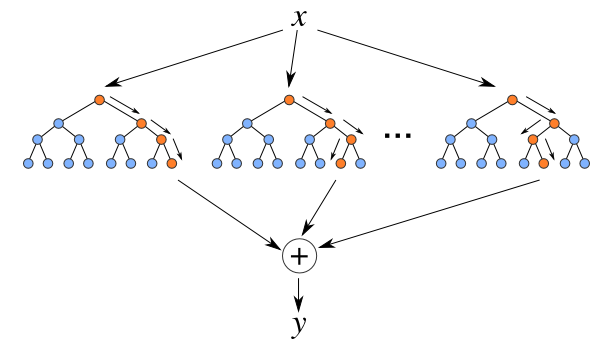

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators=100,random_state=0)
regressor4.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

### Predicting a new result

In [43]:
y_pred4 = list(regressor4.predict(x_test))
y_pred4

[206874.8,
 345004.57,
 178502.45,
 92226.08,
 239990.66,
 195200.8,
 208477.8,
 112699.71,
 292020.69,
 149213.07,
 146238.25,
 157685.03,
 144537.0,
 135041.67,
 263757.64,
 283542.58,
 201225.0,
 196053.78,
 135677.5,
 147943.5,
 147453.5,
 116087.4,
 110792.08,
 121582.2,
 254178.83,
 207553.14,
 367496.38,
 179139.85,
 316793.14,
 147642.78,
 264680.36,
 137772.75,
 283642.54,
 134067.6,
 116985.86,
 276777.69,
 158499.0,
 164196.27,
 113874.37,
 123250.26,
 136747.74,
 123070.89,
 131563.0,
 227681.58,
 172690.54,
 138779.5,
 185417.22,
 149041.25,
 104388.0,
 139278.98,
 177653.67,
 203204.15,
 133705.39,
 122937.33,
 371671.04,
 144141.64,
 106867.91,
 145786.95,
 164439.22,
 247633.29,
 242700.56,
 151198.8,
 165086.58,
 112425.6,
 202722.11,
 109472.57,
 186667.82,
 198113.9,
 144965.75,
 84525.65,
 146753.5,
 146567.33,
 233176.22,
 171610.52,
 188086.09,
 168626.74,
 98717.0,
 312593.27,
 176085.32,
 130167.6,
 114458.49,
 362997.75,
 169163.2,
 121686.06,
 268274.51,
 3069

In [44]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred4)**0.5)

27411.01606016362


In [45]:
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred4)
r4

0.8632043207865772

## Almost done!

In [46]:
r = np.array([r2,r3,r4])
val = np.array(["Multiple Linear Regression","Decision Tree Regression","Random Forest Regression"])
np.concatenate((val.reshape(len(val),1),r.reshape(len(r),1)),1)

array([['Multiple Linear Regression', '0.8613591854301375'],
       ['Decision Tree Regression', '0.7424233413746029'],
       ['Random Forest Regression', '0.8632043207865772']], dtype='<U32')

Therefore r4 (Random Forest Regression) has maximum value of R2 score, therefore, it will be used to predict final results

In [47]:
y_pred_final = list(regressor4.predict(X_test))
y_pred_final

[125917.58,
 153218.0,
 183028.97,
 178741.5,
 201594.65,
 180647.85,
 164876.72,
 174604.45,
 182649.74,
 117492.95,
 196440.87,
 95336.0,
 101288.83,
 152874.0,
 143137.64,
 383516.9,
 256213.96,
 304863.01,
 268063.67,
 449857.01,
 322666.76,
 210157.05,
 176152.28,
 172973.33,
 171487.05,
 200090.02,
 317602.93,
 250853.05,
 207167.82,
 195722.4,
 188477.35,
 105133.74,
 175562.75,
 322619.29,
 303911.4,
 222802.59,
 187583.43,
 152643.59,
 153219.93,
 159373.64,
 167452.27,
 167163.58,
 262864.33,
 233857.26,
 210896.2,
 184175.04,
 228852.25,
 208320.91,
 165927.4,
 153371.82,
 153043.0,
 164665.59,
 134649.62,
 157578.08,
 175296.9,
 161537.0,
 150998.0,
 126994.74,
 224813.42,
 139180.5,
 145053.0,
 166036.74,
 113658.73,
 121120.01,
 122084.23,
 129917.5,
 100342.25,
 129845.5,
 141532.0,
 168193.5,
 132208.22,
 109537.0,
 144599.34,
 118949.1,
 163285.34,
 121113.7,
 76095.26,
 187136.02,
 245258.33,
 119020.8,
 151617.86,
 146730.44,
 209558.08,
 88977.66,
 103534.76,
 12249

In [48]:
submission_df = pd.DataFrame({"Id" : range(len(y_pred_final)), "SalePrice" : y_pred_final})

In [49]:
submission_df

,Id,SalePrice
0,0,125917.58
1,1,153218.00
2,2,183028.97
3,3,178741.50
4,4,201594.65
...,...,...
1454,1454,86119.50
1455,1455,86278.00
1456,1456,157020.94
1457,1457,116949.60


Various regression models had been applied on the given dataset...
The Random Forest Regression model is found to be the best one!

Therefore, Random Forest Regression model is used to predict the final test set. The submission dataframe is as given above and contains all the predicted SalePrice values as asked in the question

## References

For definitions:

* https://builtin.com/data-science/regression-machine-learning
* https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226
* https://corporatefinanceinstitute.com/resources/knowledge/other/multiple-linear-regression/
* https://www.javatpoint.com/multiple-linear-regression-in-machine-learning
* https://www.saedsayad.com/decision_tree_reg.htm
* https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

For one hot encoding:
* https://www.kaggle.com/sisharaneranjana/house-price-prediction-advanced-analysis#%F0%9F%94%90Description-of-the-dataset